___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
sns.set_style('darkgrid')
%matplotlib inline
warnings.filterwarnings('ignore')

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data.csv')

**Check the head of the dataframe.**

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

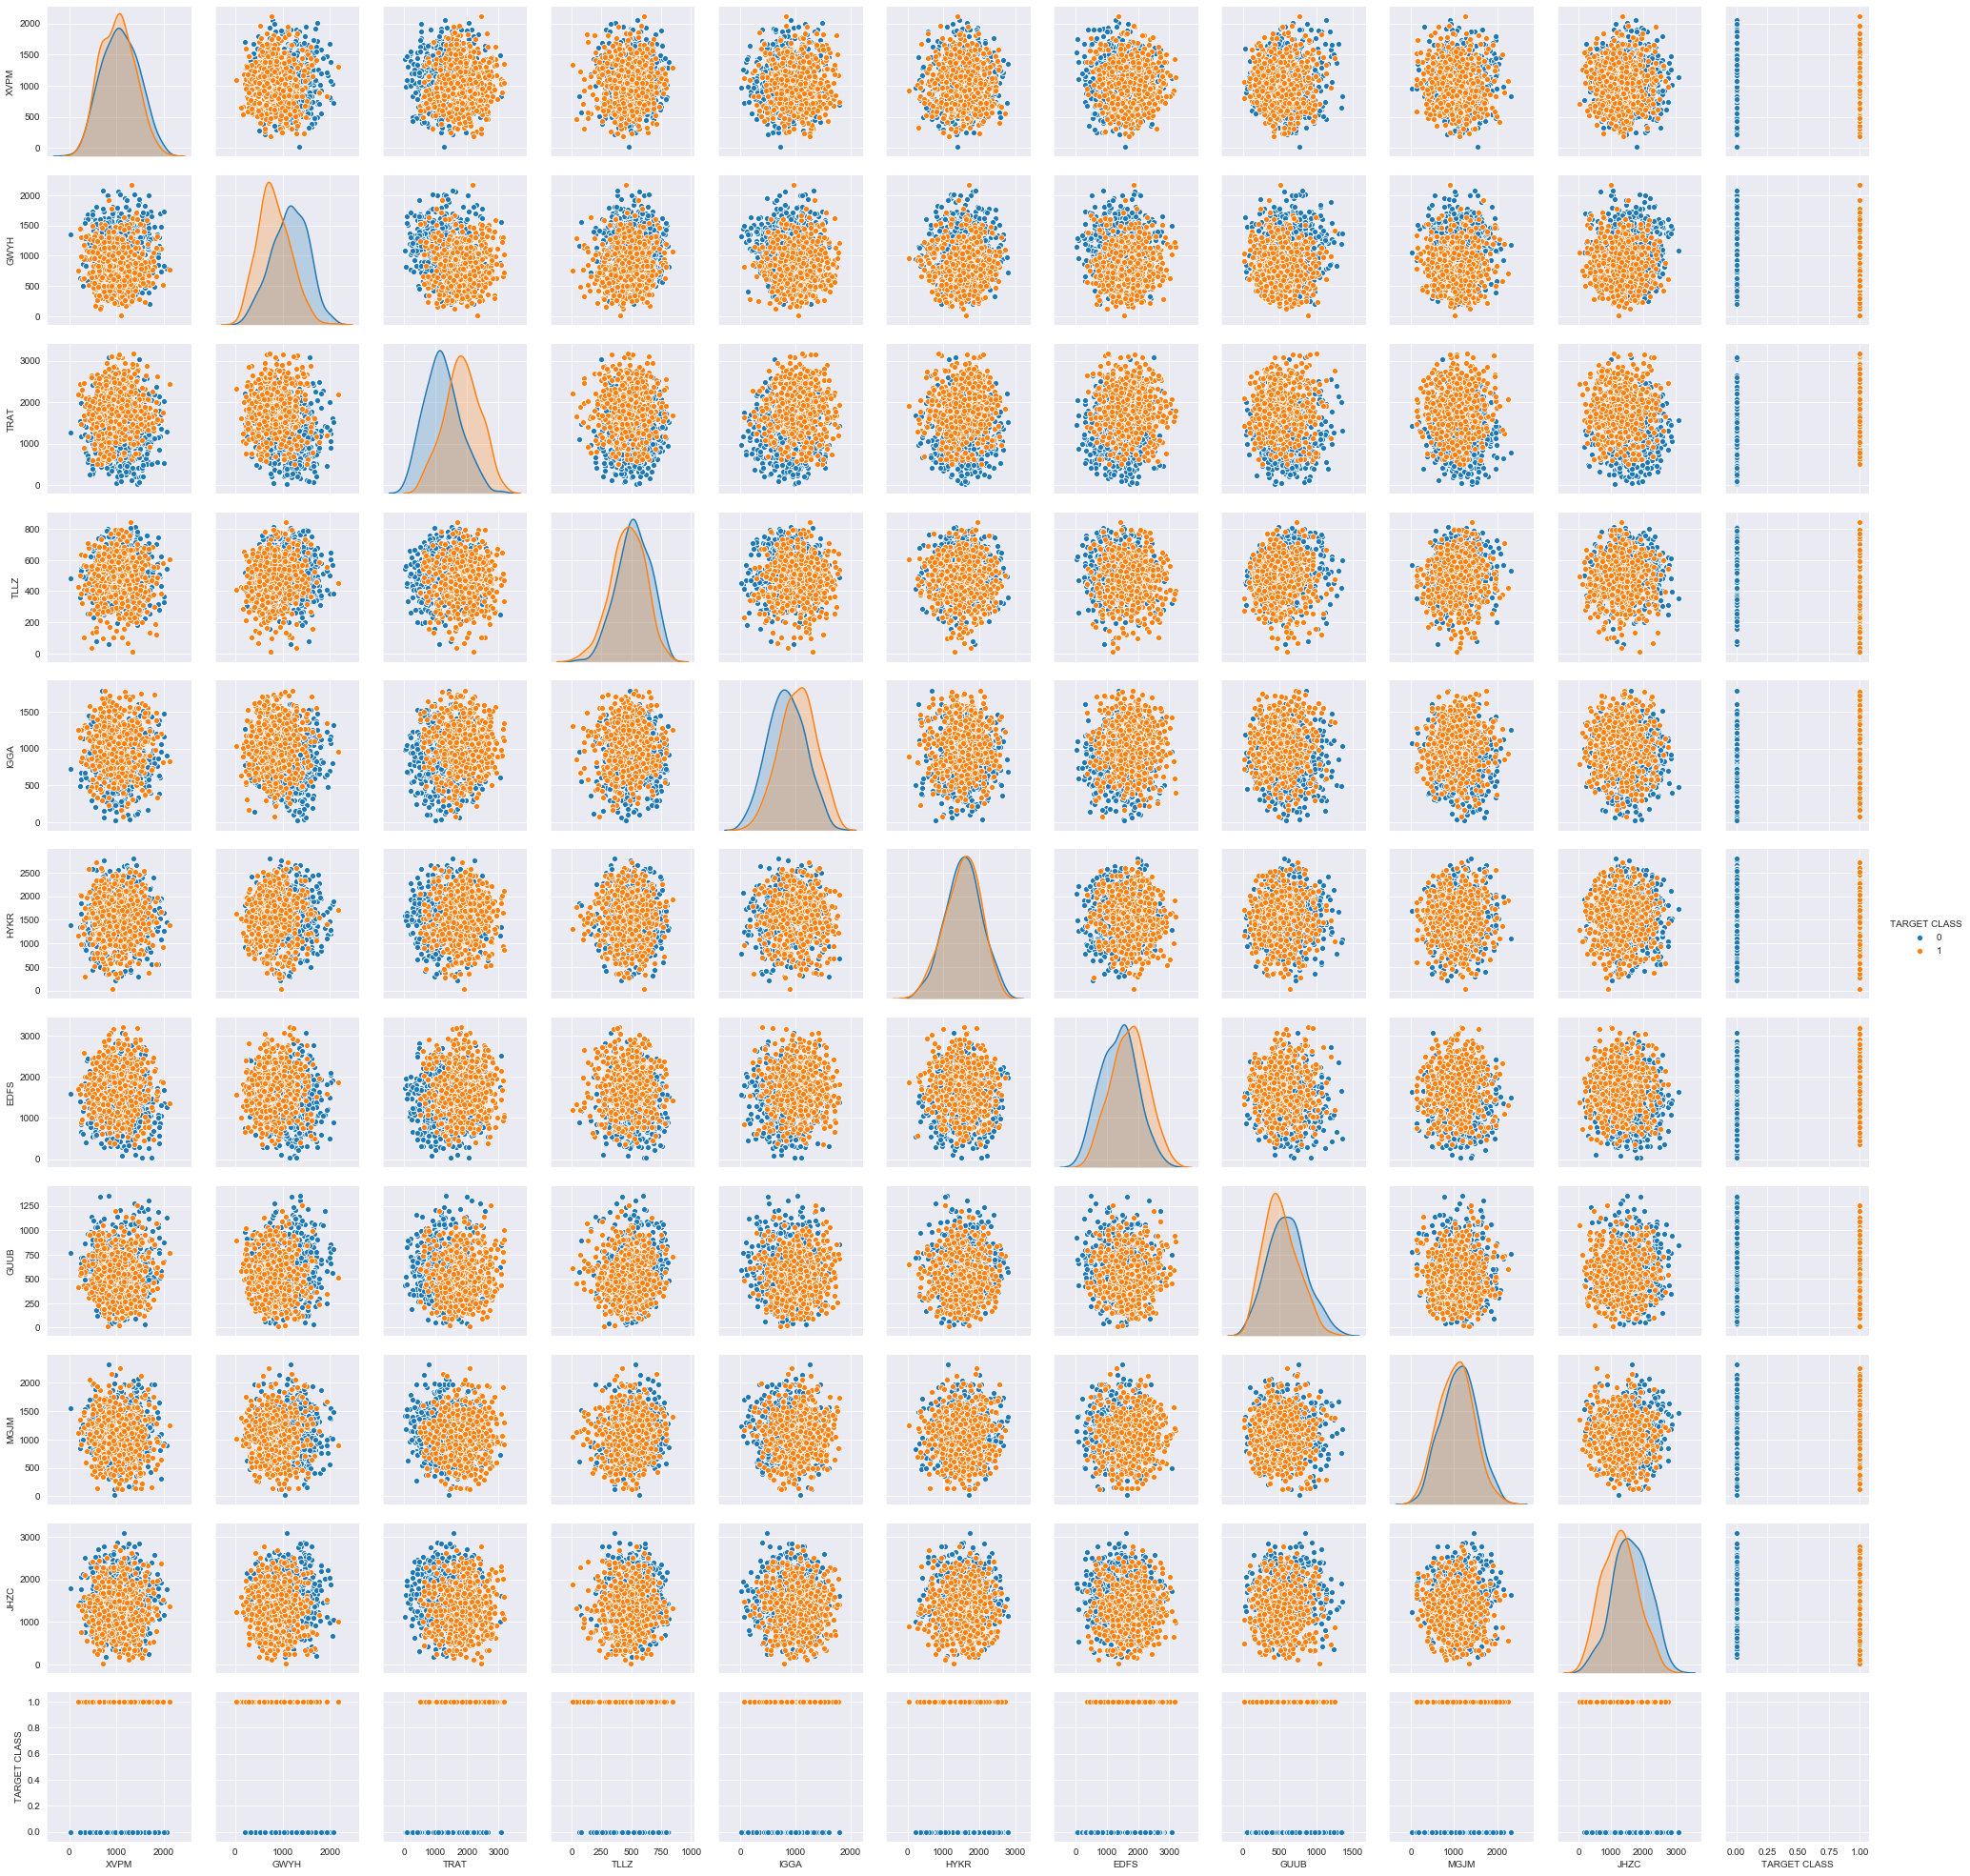

In [6]:
sns.pairplot(df, hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
df_scaled = pd.DataFrame(scaled_features, columns=df.drop('TARGET CLASS', axis=1).columns)
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df['TARGET CLASS'], test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [15]:
error_rate = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    error_rate.append(np.mean(preds != y_test))

**Now create a plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

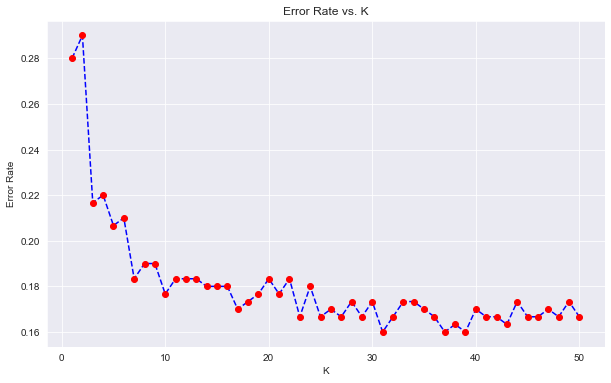

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), error_rate, '--bo', markerfacecolor='Red', markeredgecolor='Red')
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report.**

In [17]:
from sklearn.metrics import classification_report

In [18]:
# Checking with K=17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       147
           1       0.84      0.82      0.83       153

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [19]:
# Checking with K=23
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       146
           1       0.85      0.82      0.83       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [20]:
# Checking with K=31
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       142
           1       0.87      0.82      0.84       158

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [21]:
# K=31 looks the best!

# Great Job!